In [23]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [35]:
frq_min = 1
frq_max = 3
wvl_max = 1/frq_min
wvl_min = 1/frq_max
nfreq = 500
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
dfp = 1
dimensions = 1

In [36]:
dpml = np.floor(0.5*wvl_max)+1
dA = 0.5
epsilonA = 12

sz = 4*dpml+dA
#resolution = np.floor(20/wvl_min*np.sqrt(epsilonA))  # pixels/μm
resolution = 1000

freg_p = 0.1
cell_size = mp.Vector3(z=sz)

pml_layers = [mp.PML(thickness=dpml)]

In [37]:
geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=epsilonA))]

In [38]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=-0.5*sz+dpml),
                     size=mp.Vector3())]

In [39]:
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=dimensions,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=(dA)/2+freg_p))
tran = sim_vac.add_flux(fcen, df*dfp, nfreq, tran_fr)


In [40]:
pt = mp.Vector3(z=(dA)/2+freg_p)

sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000816107 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 4.5 with resolution 1000
time for set_epsilon = 0.00553393 s
-----------
field decay(t = 50.0005): 0.250007290763421 / 0.250007290763421 = 1.0
on time step 130391 (time=65.1955), 3.06772e-05 s/step
field decay(t = 100.0005): 4.1392412984846265e-17 / 0.250007290763421 = 1.655648235635473e-16
run 0 finished at t = 100.0005 (200001 timesteps)


In [41]:
vac_flux = mp.get_fluxes(tran)

In [42]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=dimensions,
                    sources=sources,
                    geometry=geometry)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=(dA)/2+freg_p))
tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [43]:
pt = mp.Vector3(z=(dA)/2+freg_p)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000555992 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 4.5 with resolution 1000
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.00491405 s
-----------
field decay(t = 50.0005): 0.12090204475593248 / 0.12090204475593248 = 1.0
on time step 133567 (time=66.7835), 2.99475e-05 s/step
field decay(t = 100.0005): 4.561641157340875e-15 / 0.12090204475593248 = 3.7730057970066234e-14
run 0 finished at t = 100.0005 (200001 timesteps)


In [44]:
R = ((np.sqrt(epsilonA)-1)/ (np.sqrt(epsilonA)+1))**2
F = 4*R/((1-R)**2)

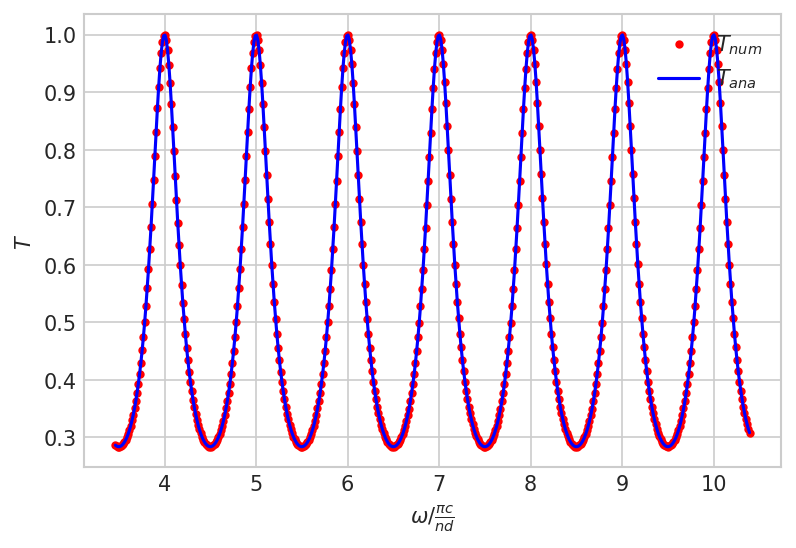

In [45]:
wl=[]
Tn=[]
Ta=[]
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)
for i in range(nfreq):
    wl = np.append(wl, 2*flux_freqs[i]*np.sqrt(epsilonA)*dA)
    Tn = np.append(Tn,tran_flux[i]/vac_flux[i])
    Ta = np.append(Ta,1/(1 + F*(np.sin(np.pi*wl[i]))**2))

if mp.am_master():
    plt.figure(dpi=150)
    plt.style.use('seaborn-whitegrid')
    plt.plot(wl,Tn,'r.',label='$T_{num}$')
    plt.plot(wl,Ta,'b-',label='$T_{ana}$')
    plt.xlabel(r'$\omega/\frac{\pi c}{n d}$')
    plt.ylabel("$T$")
    plt.legend(loc="upper right")
    plt.savefig('Tasks_2_1.png')
    plt.show()    